# Load data and pickle it

This notebook flows on from `scan - collection relationship` which investigates the `allScanDetections.csv` file and relates it to the collection in the mongodb.

In [24]:
from tqdm import tqdm
import json
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

Load the data from the CSV and parse it into a dataframe. The CSV is about 6gb, so it needs about that much ram to be able to run. It might run on less capable systems if the chunks parameter is set.

In [2]:
a = pd.read_csv('training.csv')

dtypes = {"minor": int, "uuid": str, "time": str, "rssi": int, "agentId": str}
parse_dates = ["time"]
a = pd.read_csv("training.csv", 
                dtype=dtypes,
                parse_dates=parse_dates, 
                date_parser=pd.datetimes.to_datetime)
a.head()

C:\Users\ivarshney\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.core.datetools.to_datetime is deprecated. Please use pandas.core.tools.datetimes.to_datetime instead.
  


,minor,uuid,time,rssi,agentId
0,288,17520757a1412b175c03687a7102a104,2016-11-23 23:06:34.012,-72,000000007d418b7a
1,288,17520757a1412b175c03687a7102a104,2016-11-23 23:06:34.019,-82,00000000029d74c5
2,360,17520757a1412b175c03687a7102a104,2016-11-23 23:06:34.059,-96,00000000c7ce4c76
3,360,17520757a1412b175c03687a7102a104,2016-11-23 23:06:34.061,-75,000000005e6ed248
4,360,17520757a1412b175c03687a7102a104,2016-11-23 23:06:34.061,-87,00000000fc7843f8


## Let's have a look at what we're dealing with:

In [22]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70949512 entries, 0 to 70949511
Data columns (total 4 columns):
minor      int32
time       datetime64[ns]
rssi       int32
agentId    object
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 1.6+ GB


In [6]:
a.memory_usage()

Index             80
minor      283798048
uuid       567596096
time       567596096
rssi       283798048
agentId    567596096
dtype: int64

In [18]:
a.iloc[0]

minor                             288
time       2016-11-23 23:06:34.012000
rssi                              -72
agentId              000000007d418b7a
Name: 0, dtype: object

In [19]:
a.iloc[100000]

minor                              86
time       2016-11-23 23:09:14.270000
rssi                              -83
agentId              0000000081d28129
Name: 100000, dtype: object

In [20]:
a.columns

Index(['minor', 'time', 'rssi', 'agentId'], dtype='object')

In [21]:
a.minor.unique()

array([  288,   360,    23,   404,   294,   377,    18,   371,   386,
         388,   402,   296,   304,   370,   357,     5,     3,   100,
         384,   406,   393,   407,   130,   369,     7,   372,   256,
         385,   400,   375,   405,   116,    72,   401,   153,   358,
          32,   131,   368,    39,    86,   390,   409,    84,   361,
          82,   387,   354,   403,   374,   359,   355,   392,   353,
         275,    50,   295,   152,   391,   120, 21504,   145, 34816,
         114, 29184], dtype=int64)

In [11]:
len(a.minor.unique())

65

In [12]:
a.agentId.unique()

array(['000000007d418b7a', '00000000029d74c5', '00000000c7ce4c76',
       '000000005e6ed248', '00000000fc7843f8', '00000000b648975e',
       '00000000035d7102', '000000001ec6ed41', '0000000031f984ad',
       '00000000b9cf80e3', '00000000b571f8e3', '000000002c4ab387',
       '0000000063a52908', '000000005de72066', '000000002f9f3fae',
       '000000004ff7d75b', '0000000023e614ba', '0000000044bfba76',
       '00000000e9753ecb', '0000000090560630', '0000000081d28129',
       '000000000b41629a', '0000000084e99283', '0000000013bed9f7',
       '00000000c6134299', '00000000449f65df', '0000000018550a76',
       '00000000733c80c0', '000000003d6e520a', '000000001b1b0d2c',
       '00000000fe8992e8', '000000001b31f3ec', '0000000097ad1922',
       '000000001159bb8a', '000000006c1a3b5a', '00000000cdfeb599',
       '00000000b6672df6', '000000004cb3ff60', '0000000020294bbd',
       '000000004ae99a8b', '0000000000d80090', '00000000fe55db18'], dtype=object)

In [13]:
a.uuid.unique()

array(['17520757a1412b175c03687a7102a104'], dtype=object)

The dataframe is quite big, there's only actually one `uuid` in it, but it's the same memory usage as the `time` column. if we take it out we save almost a gigabyte of memory.

In [16]:
a.drop('uuid', axis=1, inplace=True)

In [17]:
a.memory_usage()

Index             80
minor      283798048
time       567596096
rssi       283798048
agentId    567596096
dtype: int64

In [ ]:
a.info()

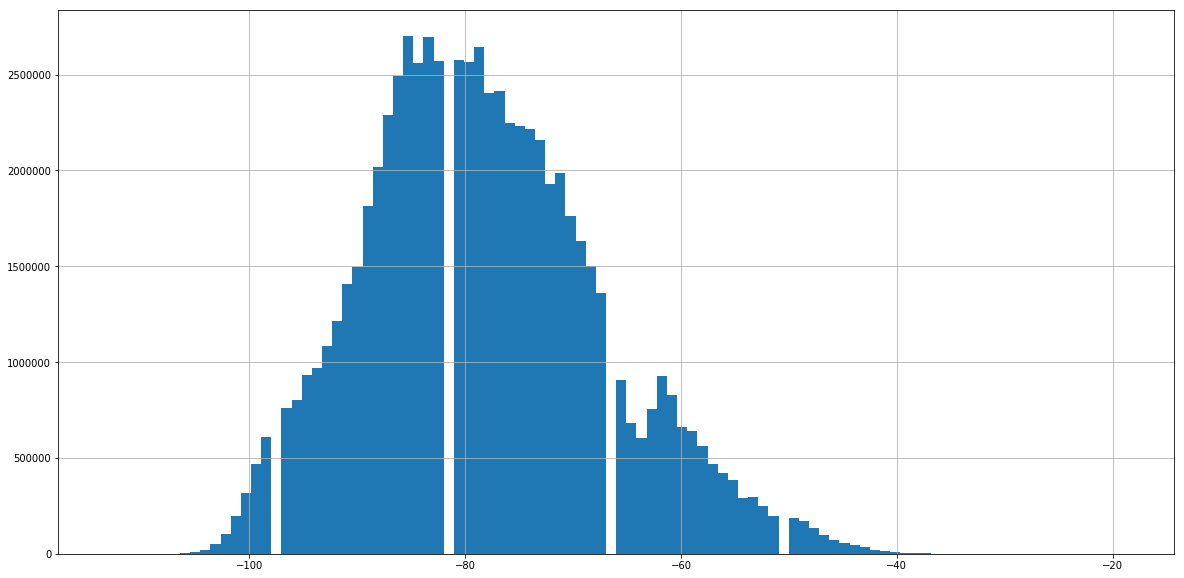

In [25]:
a.rssi.hist(bins=100)

This is what we expect to see. There's no reason for `rssi` detections to be anything other than normal.

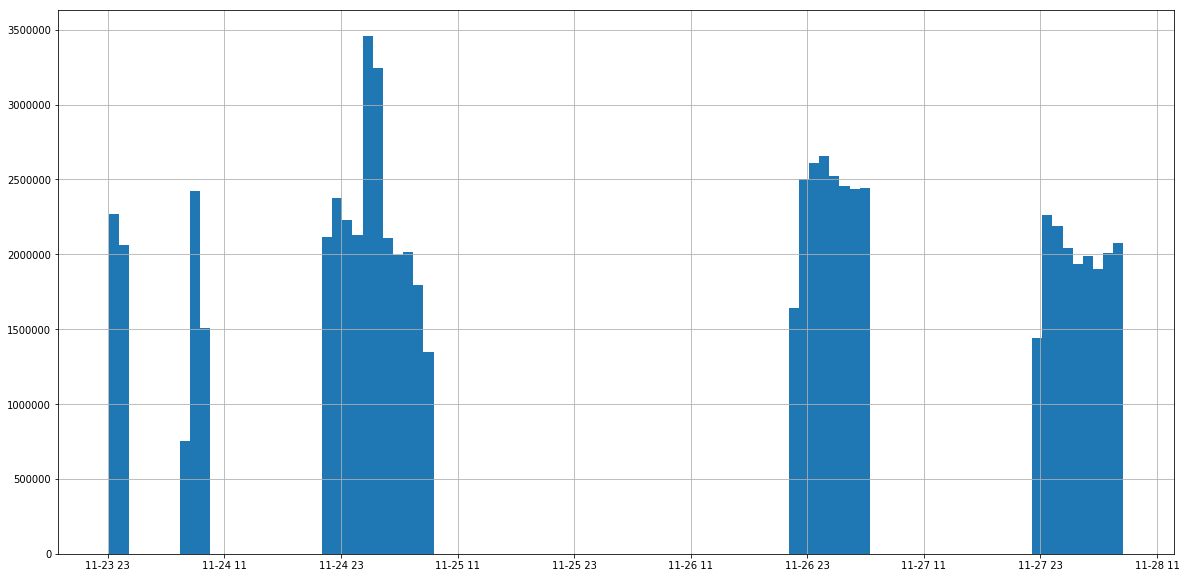

In [26]:
a.time.hist(bins=100)

This is also expected. It's showing a more or less uniform distribution in teh time periods that we queried for.

## Pickle

We pickle to dump a binary representation of the dataframe so that other notebooks can pick it up easily.

In [23]:
a.to_pickle("candidate_data.p")

![](http://i0.kym-cdn.com/photos/images/newsfeed/001/282/726/110.png)